# Feature selection

**This notebook is for development ONLY**. For scripts, see scripts/Correlations_total_oxygen.py and scripts/Join_Features_Spearman.py

See https://git.bia-christian.de/bia/lab_book_VEO/wiki/oxygen

# Spearman correlation between features

See https://git.bia-christian.de/bia/lab_book_VEO/wiki/oxygen#correlation-and-join-features

This block was transfered to BacterialData/oxygen/scripts/Correlations_total_oxygen.py

In [15]:
#Turn off scientific notation
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import numpy as np
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:0.2f}'.format})

#Activate print all activities
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [37]:
import pickle
import zstandard
import time
from datetime import datetime
import numpy as np

ts = time.time() 
print("Started script! Loading input file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_oxygen_kmer9_selected-filterNA.pickle.zst', 
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_oxygen_gene-families_selected-filterNA.pickle.zst', 
                    'rb') as f:
	df = pickle.load(f)

ts = time.time() 
print("Loaded input pickle zst file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

/tmp/ipykernel_45460/1140729880.py:8: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  print("Started script! Loading input file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))


Started script! Loading input file... 2024-06-25 14:52:28
Loaded input pickle zst file... 2024-06-25 14:52:36


/tmp/ipykernel_45460/1140729880.py:16: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  print("Loaded input pickle zst file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))


In [38]:
df.shape
df.head()

(7255, 131073)

,AAAAAAAAA,AAAAAAAAC,AAAAAAAAG,AAAAAAAAT,AAAAAAACA,AAAAAAACC,AAAAAAACG,AAAAAAACT,AAAAAAAGA,AAAAAAAGC,...,TTTCTCAAA,TTTGAAAAA,TTTGACAAA,TTTGCAAAA,TTTGCCAAA,TTTGGAAAA,TTTGTAAAA,TTTTAAAAA,TTTTCAAAA,Oxygen tolerance
Best assembly,,,,,,,,,,,,,,,,,,,,,
1002367.3,53,72,54,82,96,11,52,52,95,46,...,37,74,49,98,59,36,54,69,66,anaerobe
1006155.5,47,87,88,137,237,80,131,139,229,159,...,84,314,65,180,75,161,133,268,324,anaerobe
1008452.3,14,11,26,39,78,14,41,64,104,62,...,95,248,128,98,59,114,108,214,245,facultative
1009464.3,30,18,5,24,34,11,24,23,28,17,...,35,80,23,232,77,77,82,82,85,anaerobe
102684.41,34,38,33,57,122,30,65,88,120,105,...,67,327,158,131,112,173,100,254,328,facultative


In [39]:
# Separar as features (X) e o grupos (y)
#Full dataset:
#X = df.iloc[:, :-1]  
#y = df.iloc[:, -1] 

#Subset for developing:
X = df.iloc[0:100, 0:100]
y = df.iloc[0:100, -1] 

X['Oxygen tolerance'] = y

#Save calculations to file
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_oxygen_gene-familiesTEST_selected-filterNA.pickle.zst', 'wb') as f:#
with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_oxygen_kmer9TEST_selected-filterNA.pickle.zst', 'wb') as f:#
	pickle.dump(X, f)

In [10]:
# Calcular a correlação de Spearman
correlation_matrix = X.corr(method='spearman')

In [11]:
#This is just for the mock dataset!
#correlation_matrix = correlation_matrix.drop(columns=correlation_matrix.columns[0])
#correlation_matrix = correlation_matrix.drop(index=correlation_matrix.index[0])

In [12]:
correlation_matrix.head()
correlation_matrix.shape

,COG3696@2,COG0606@2,33SZW@2,COG0774@1,COG5009@2,COG0188@2,COG0265@2,COG3270@1,2Z7XP@2,COG1086@2,...,COG2273@2,32DYM@2,COG0006@2,COG3610@1,COG2985@1,COG2873@2,COG0480@2,COG1109@2,COG2989@2,COG0488@2
COG3696@2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COG0606@2,NaN,1.00,0.07,0.28,0.03,-0.07,0.36,0.29,0.10,0.27,...,0.14,0.07,0.32,0.13,0.29,0.06,-0.07,0.52,0.30,0.24
33SZW@2,NaN,0.07,1.00,0.26,0.03,0.01,0.10,0.21,0.70,0.11,...,0.34,1.00,0.08,0.57,0.21,0.34,0.01,0.06,0.17,0.02
COG0774@1,NaN,0.28,0.26,1.00,0.13,0.04,0.21,0.13,0.37,0.35,...,0.43,0.26,-0.02,0.45,0.21,0.21,0.04,0.24,0.10,0.07
COG5009@2,NaN,0.03,0.03,0.13,1.00,0.30,0.13,0.07,0.05,0.18,...,-0.02,0.03,0.38,0.06,0.07,-0.15,0.30,0.24,0.05,0.33


(100, 100)

In [13]:
#OBS: if there is no variability in a column, the correlation will be NA!

#Creating a good mock table for debugging
#correlation_matrix.drop(correlation_matrix.columns[0], axis=1, inplace=True)
#correlation_matrix.drop(correlation_matrix.columns[4], axis=1, inplace=True)
#correlation_matrix.drop(correlation_matrix.index[0], axis=0, inplace=True)
#correlation_matrix.drop(correlation_matrix.index[4], axis=0, inplace=True)

correlation_matrix.head(n=10)
#p_values.head()

,COG3696@2,COG0606@2,33SZW@2,COG0774@1,COG5009@2,COG0188@2,COG0265@2,COG3270@1,2Z7XP@2,COG1086@2,...,COG2273@2,32DYM@2,COG0006@2,COG3610@1,COG2985@1,COG2873@2,COG0480@2,COG1109@2,COG2989@2,COG0488@2
COG3696@2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COG0606@2,NaN,1.00,0.07,0.28,0.03,-0.07,0.36,0.29,0.10,0.27,...,0.14,0.07,0.32,0.13,0.29,0.06,-0.07,0.52,0.30,0.24
33SZW@2,NaN,0.07,1.00,0.26,0.03,0.01,0.10,0.21,0.70,0.11,...,0.34,1.00,0.08,0.57,0.21,0.34,0.01,0.06,0.17,0.02
COG0774@1,NaN,0.28,0.26,1.00,0.13,0.04,0.21,0.13,0.37,0.35,...,0.43,0.26,-0.02,0.45,0.21,0.21,0.04,0.24,0.10,0.07
COG5009@2,NaN,0.03,0.03,0.13,1.00,0.30,0.13,0.07,0.05,0.18,...,-0.02,0.03,0.38,0.06,0.07,-0.15,0.30,0.24,0.05,0.33
COG0188@2,NaN,-0.07,0.01,0.04,0.30,1.00,0.10,0.05,0.01,0.09,...,0.03,0.01,0.13,0.02,0.05,0.03,1.00,0.16,-0.17,-0.02
COG0265@2,NaN,0.36,0.10,0.21,0.13,0.10,1.00,0.31,0.14,0.26,...,0.15,0.10,0.46,0.18,0.36,0.07,0.10,0.49,0.34,0.18
COG3270@1,NaN,0.29,0.21,0.13,0.07,0.05,0.31,1.00,0.30,-0.18,...,0.15,0.21,0.24,0.38,0.86,0.34,0.05,0.12,0.59,0.08
2Z7XP@2,NaN,0.10,0.70,0.37,0.05,0.01,0.14,0.30,1.00,0.15,...,0.22,0.70,0.11,0.81,0.30,0.22,0.01,0.09,0.07,0.03
COG1086@2,NaN,0.27,0.11,0.35,0.18,0.09,0.26,-0.18,0.15,1.00,...,0.09,0.11,0.16,0.19,-0.18,0.02,0.09,0.41,-0.08,0.17


In [146]:
#Save calculations to file
with zstandard.open('data/spearman_corr_df_oxygen_gene-families_selected-filterNA.pickle.zst', 'wb') as f:
	pickle.dump(correlation_matrix, f)

In [14]:
#Prepare for plot below
#Populate down_triangle of the matrix and the 1.0 is diagonals with Na
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Flatten the matrix and drop NaN values
correlation_values = upper_triangle.stack().values
len(correlation_values)

#Checking code block above for my mock dataset of 99 columns
#upper_triangle
#len(upper_triangle)     #99
#((99*99)/2) - 99/2      #4851.0
#len(correlation_values) #4851

4851

In [15]:
upper_triangle.shape
upper_triangle.head(n = 10)

(100, 100)

,COG3696@2,COG0606@2,33SZW@2,COG0774@1,COG5009@2,COG0188@2,COG0265@2,COG3270@1,2Z7XP@2,COG1086@2,...,COG2273@2,32DYM@2,COG0006@2,COG3610@1,COG2985@1,COG2873@2,COG0480@2,COG1109@2,COG2989@2,COG0488@2
COG3696@2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COG0606@2,NaN,NaN,0.07,0.28,0.03,-0.07,0.36,0.29,0.10,0.27,...,0.14,0.07,0.32,0.13,0.29,0.06,-0.07,0.52,0.30,0.24
33SZW@2,NaN,NaN,NaN,0.26,0.03,0.01,0.10,0.21,0.70,0.11,...,0.34,1.00,0.08,0.57,0.21,0.34,0.01,0.06,0.17,0.02
COG0774@1,NaN,NaN,NaN,NaN,0.13,0.04,0.21,0.13,0.37,0.35,...,0.43,0.26,-0.02,0.45,0.21,0.21,0.04,0.24,0.10,0.07
COG5009@2,NaN,NaN,NaN,NaN,NaN,0.30,0.13,0.07,0.05,0.18,...,-0.02,0.03,0.38,0.06,0.07,-0.15,0.30,0.24,0.05,0.33
COG0188@2,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.01,0.09,...,0.03,0.01,0.13,0.02,0.05,0.03,1.00,0.16,-0.17,-0.02
COG0265@2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.31,0.14,0.26,...,0.15,0.10,0.46,0.18,0.36,0.07,0.10,0.49,0.34,0.18
COG3270@1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,-0.18,...,0.15,0.21,0.24,0.38,0.86,0.34,0.05,0.12,0.59,0.08
2Z7XP@2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.15,...,0.22,0.70,0.11,0.81,0.30,0.22,0.01,0.09,0.07,0.03
COG1086@2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.09,0.11,0.16,0.19,-0.18,0.02,0.09,0.41,-0.08,0.17


In [16]:
# Convert the DataFrame to a NumPy array and flatten it to create a list
values_list = upper_triangle.to_numpy().flatten()

# Remove NaN values from the list
cleaned_list = [value for value in values_list if not np.isnan(value)]
# Check how many values I have
len(cleaned_list)
# Should be the same value as above
int( ( (upper_triangle.shape[0]*upper_triangle.shape[1]) - upper_triangle.shape[1] ) / 2 )

4851

4950

In [20]:
#Create filtered_list if needed
filtered_list = [value for value in cleaned_list if value <= -0.1 or value >= 0.1]

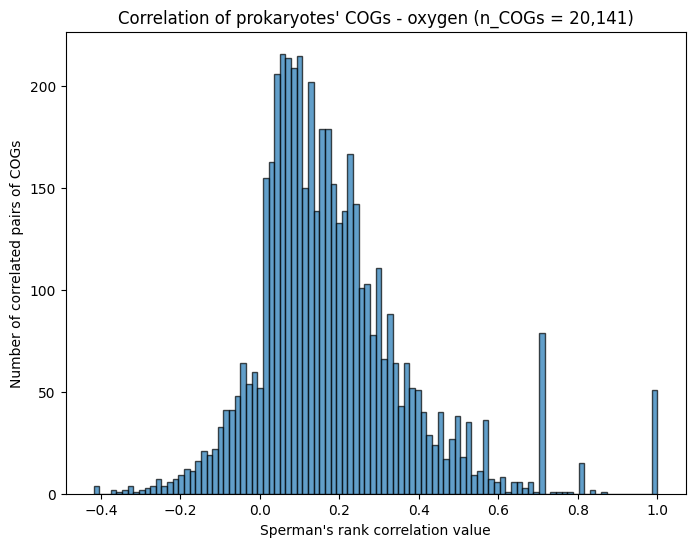

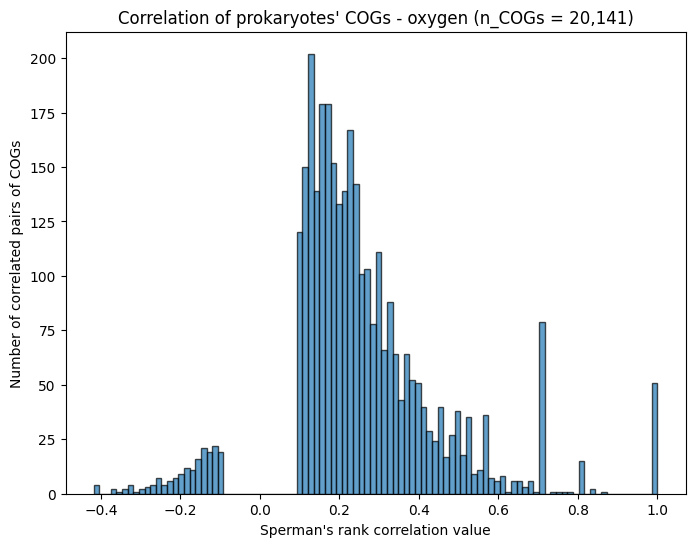

In [23]:
#Visualize distribution of correlations
import matplotlib.pyplot as plt

# Plot the histogram

plt.figure(figsize=(8, 6))
plt.hist(cleaned_list, bins=100, edgecolor='k', alpha=0.7);
#plt.hist(filtered_list, bins=100, edgecolor='k', alpha=0.7);
plt.title('Correlation of prokaryotes\' COGs - oxygen (n_COGs = 20,141)')
plt.xlabel('Sperman\'s rank correlation value');
plt.ylabel('Number of correlated pairs of COGs');

plt.figure(figsize=(8, 6))
plt.hist(filtered_list, bins=100, edgecolor='k', alpha=0.7);
#plt.hist(filtered_list, bins=100, edgecolor='k', alpha=0.7);
plt.title('Correlation of prokaryotes\' COGs - oxygen (n_COGs = 20,141)')
plt.xlabel('Sperman\'s rank correlation value');
plt.ylabel('Number of correlated pairs of COGs');
#plt.yscale('log')

#plt.savefig('figures/spearman_corr_df_oxygen_gene-families_selected-filterNA.png', dpi=300)  # Salvar o gráfico como imagem
#plt.savefig('figures/spearman_corr_df_oxygen_gene-families_selected-filterNA_0.10gap.png', dpi=300)  # Salvar o gráfico como imagem

#plt.show();

# Join highly correlated features 

Adapted from Heyde's script: https://github.com/ProfHeydeFranca/BacterialData/blob/main/Join_Features.py     
This block was transfered to BacterialData/oxygen/scripts/Correlations_total_oxygen.py  

See: https://git.bia-christian.de/bia/lab_book_VEO/wiki/oxygen#correlation-and-join-features

In [34]:
import pickle
import zstandard
import time
from datetime import datetime

ts = time.time() 
print("Started script! Loading input file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M'))

#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_oxygen_gene-familiesTEST_selected-filterNA.pickle.zst', 'rb') as f:
with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_oxygen_kmer9TEST_selected-filterNA.pickle.zst', 'rb') as f:
	df = pickle.load(f)

with zstandard.open('/home/bia/Documents/BacterialData/oxygen/data/spearman_corr_df_oxygen_gene-familiesTEST_selected-filterNA.pickle.zst', 'rb') as f:
#with zstandard.open('/home/bia/Documents/BacterialData/oxygen/data/spearman_corr_df_oxygen_gene-families_selected-filterNA.pickle.zst', 'rb') as f:
	correlation_matrix = pickle.load(f)

Started script! Loading input file... 2024-06-25 14:52


/tmp/ipykernel_45460/2258217574.py:7: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  print("Started script! Loading input file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M'))


In [35]:
#For understanding the code only
#df = df.iloc[0:11, 0:11]
#df.drop(df.columns[0], axis=1, inplace=True)
#df.drop(df.columns[4], axis=1, inplace=True)
#df.drop(df.index[0], axis=0, inplace=True)
#df.drop(df.index[4], axis=0, inplace=True)

In [36]:
df.shape
df.head()

correlation_matrix.shape
correlation_matrix.head()

(100, 100)

,AAAAAAAAA,AAAAAAAAC,AAAAAAAAG,AAAAAAAAT,AAAAAAACA,AAAAAAACC,AAAAAAACG,AAAAAAACT,AAAAAAAGA,AAAAAAAGC,...,AAAAACCGG,AAAAACCGT,AAAAACCTA,AAAAACCTC,AAAAACCTG,AAAAACCTT,AAAAACGAA,AAAAACGAC,AAAAACGAG,AAAAACGAT
Best assembly,,,,,,,,,,,,,,,,,,,,,
1002367.3,53,72,54,82,96,11,52,52,95,46,...,9,17,21,25,15,24,52,30,24,36
1006155.5,47,87,88,137,237,80,131,139,229,159,...,31,58,49,64,63,68,158,77,95,150
1008452.3,14,11,26,39,78,14,41,64,104,62,...,4,23,24,33,42,77,59,22,42,54
1009464.3,30,18,5,24,34,11,24,23,28,17,...,5,24,20,25,27,28,31,24,22,34
102684.41,34,38,33,57,122,30,65,88,120,105,...,8,27,31,31,33,54,70,42,32,63


(100, 100)

,COG3696@2,COG0606@2,33SZW@2,COG0774@1,COG5009@2,COG0188@2,COG0265@2,COG3270@1,2Z7XP@2,COG1086@2,...,COG2273@2,32DYM@2,COG0006@2,COG3610@1,COG2985@1,COG2873@2,COG0480@2,COG1109@2,COG2989@2,COG0488@2
COG3696@2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COG0606@2,NaN,1.00,0.07,0.28,0.03,-0.07,0.36,0.29,0.10,0.27,...,0.14,0.07,0.32,0.13,0.29,0.06,-0.07,0.52,0.30,0.24
33SZW@2,NaN,0.07,1.00,0.26,0.03,0.01,0.10,0.21,0.70,0.11,...,0.34,1.00,0.08,0.57,0.21,0.34,0.01,0.06,0.17,0.02
COG0774@1,NaN,0.28,0.26,1.00,0.13,0.04,0.21,0.13,0.37,0.35,...,0.43,0.26,-0.02,0.45,0.21,0.21,0.04,0.24,0.10,0.07
COG5009@2,NaN,0.03,0.03,0.13,1.00,0.30,0.13,0.07,0.05,0.18,...,-0.02,0.03,0.38,0.06,0.07,-0.15,0.30,0.24,0.05,0.33


In [21]:
import pandas as pd
import numpy as np

In [185]:
# Check for non-float columns
#non_float_columns = df.select_dtypes(exclude=['float']).columns

# Display the non-float columns
#if non_float_columns.empty:
#    print("All columns are of type float.")
#else:
#    print("Columns with non-float types:")
#    print(non_float_columns)

Columns with non-float types:
Index(['COG0606@2', '33SZW@2', 'COG0774@1', 'COG5009@2', 'COG0265@2',
       'COG3270@1', '2Z7XP@2', 'COG1086@2', 'COG2244@2'],
      dtype='object')


In [22]:
ts = time.time() 
print("Identifying highly correlated columns...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M'))

# Definir o limite de valor de correlação para agrupamento
threshold = 0.9

# Inicializar um dicionário para armazenar os grupos de colunas
column_groups = {}

# Iterar sobre as colunas e identificar grupos de colunas altamente correlacionadas
for col in correlation_matrix.columns:

    #print(col)
    
    # Verificar se a coluna já foi agrupada
    if col not in column_groups:
        
        # Encontrar colunas altamente correlacionadas com a coluna atual
        correlated_columns = correlation_matrix.index[correlation_matrix[col] > threshold].tolist()

        #print(correlated_columns)
        
        # Adicionar a coluna atual ao grupo
        column_groups[col] = correlated_columns
        
        # Marcar outras colunas do grupo como já agrupadas
        for correlated_col in correlated_columns:
            if correlated_col != col:
                column_groups[correlated_col] = correlated_columns

#To understand the code 
#print('column_groups', column_groups)        
#column_groups {'COG0606@2': ['COG0606@2'], '33SZW@2': ['33SZW@2', 'COG0774@1', 'COG3270@1', '2Z7XP@2'], 'COG0774@1': ['33SZW@2', 'COG0774@
#1', 'COG3270@1', '2Z7XP@2'], 'COG3270@1': ['33SZW@2', 'COG0774@1', 'COG3270@1', '2Z7XP@2'], '2Z7XP@2': ['33SZW@2', 'COG0774@1', 'COG3270@1',
#'2Z7XP@2'], 'COG5009@2': ['COG5009@2'], 'COG0265@2': ['COG0265@2'], 'COG1086@2': ['COG1086@2'], 'COG2244@2': ['COG2244@2']}

Identifying highly correlated columns... 2024-06-25 14:34


/tmp/ipykernel_45460/546432724.py:2: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  print("Identifying highly correlated columns...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M'))


In [23]:
ts = time.time() 
print("Filtering unique groups of columns...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M'))

# Filtrar grupos únicos de colunas
unique_groups = []
already_seen = set()

for group in column_groups.values():
    
    group_tuple = tuple(sorted(group))

    if group_tuple not in already_seen:
        unique_groups.append(group)
        already_seen.add(group_tuple)

#unique_groups
#[['COG0606@2'],
# ['33SZW@2', 'COG0774@1', 'COG3270@1', '2Z7XP@2'],
# ['COG5009@2'],
# ['COG0265@2'],
# ['COG1086@2'],
# ['COG2244@2']]

#already_seen

Filtering unique groups of columns... 2024-06-25 14:34


/tmp/ipykernel_45460/1531934691.py:2: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  print("Filtering unique groups of columns...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M'))


In [24]:
ts = time.time() 
print("Store grouped columns...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M'))

# Criar um novo DataFrame para armazenar as colunas agrupadas
dados_agrupados = pd.DataFrame()

# Iterar sobre os grupos de colunas e calcular estatísticas resumidas
for group in unique_groups:
    # Usar a média das colunas no grupo como representação
    group_mean = df[group].mean(axis=1)

    group_str = ','.join(group)
    pre_group_name = group_str.replace("[", "").replace("]", "").replace("'", "")
    group_name = f'{pre_group_name}'
    #group_name = f'Group_{group[0]}'

    dados_agrupados[group_name] = group_mean

Store grouped columns... 2024-06-25 14:34


/tmp/ipykernel_45460/434142206.py:2: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  print("Store grouped columns...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M'))


In [25]:
df.iloc[:, -1]

Best assembly
1002367.3    anaerobe
108980.91      aerobe
1111140.3      aerobe
1112212.3      aerobe
1120962.3      aerobe
               ...   
655815.4       aerobe
65959.23       aerobe
669.48         aerobe
67824.35       aerobe
69395.9        aerobe
Name: Oxygen tolerance, Length: 100, dtype: object

In [26]:
#ts = time.time() 
#print("Add target column...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M'))

# Adicionar a coluna y ao DataFrame agrupado
y = df.iloc[:, -1]  # Última coluna
#y

#Get shape without target!
dados_agrupados.shape
dados_agrupados['Target'] = y

#dados_agrupados.head()

Best assembly
1002367.3    anaerobe
108980.91      aerobe
1111140.3      aerobe
1112212.3      aerobe
1120962.3      aerobe
               ...   
655815.4       aerobe
65959.23       aerobe
669.48         aerobe
67824.35       aerobe
69395.9        aerobe
Name: Oxygen tolerance, Length: 100, dtype: object

(100, 85)

,,COG0606@2,"33SZW@2,33UZ0@2,2ZFEM@2,33E1D@2,34282@2,33QA2@2,COG2385@1,32DYM@2",COG0774@1,COG5009@2,"COG0188@2,COG0480@2",COG0265@2,COG3270@1,"2Z7XP@2,COG1705@1,COG4227@1,2Z8E1@2,2Z7Y7@2,2Z8NP@2,2Z9RU@2",COG1086@2,...,COG3669@2,COG2273@2,COG0006@2,COG3610@1,COG2985@1,COG2873@2,COG1109@2,COG2989@2,COG0488@2,Target
Best assembly,,,,,,,,,,,,,,,,,,,,,
1002367.3,NaN,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,anaerobe
108980.91,NaN,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,aerobe
1111140.3,NaN,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,1.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,aerobe
1112212.3,NaN,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,aerobe
1120962.3,NaN,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,aerobe


In [27]:
ts = time.time() 
print("Saving file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M'))

with zstandard.open('/home/bia/Documents/BacterialData/oxygen/data/Oxygen_gene-families_Features_Corr_Spearman_with_Target.pickle.zst', 'wb') as f:
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_oxygen_gene-families_selected-filterNA.pickle.zst', 'wb') as f:
	pickle.dump(dados_agrupados, f)

ts = time.time() 
print("Finished script...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M'))

Saving file... 2024-06-25 14:34
Finished script... 2024-06-25 14:34


/tmp/ipykernel_45460/1261938972.py:2: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  print("Saving file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M'))
/tmp/ipykernel_45460/1261938972.py:9: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  print("Finished script...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M'))


In [40]:
#Testing if file was saved properly
with zstandard.open('/home/bia/Documents/BacterialData/oxygen/data/Oxygen_kmer9TEST_Features_Corr_Spearman_with_Target.pickle.zst', 'rb') as f:
#with zstandard.open('/home/bia/Documents/BacterialData/oxygen/data/Oxygen_gene-familiesTEST_Features_Corr_Spearman_with_Target.pickle.zst', 'rb') as f:
	df = pickle.load(f)
df.head()

,"AAAAAAAAA,AAAAAAAAC,AAAAAAAAG","AAAAAAAAC,AAAAAAACA,AAAAAAAGC,AAAAAAAGG,AAAAAACAC,AAAAAACAG,AAAAAACCA,AAAAAACCT,AAAAAACTC,AAAAAACTG,AAAAAAGCA,AAAAAATGC,AAAAACAGA,AAAAACAGG,AAAAACATC,AAAAACATG,AAAAACCAT,AAAAACCTT","AAAAAAAAC,AAAAAAAAG,AAAAAAAAT,AAAAAAACA,AAAAAAACT,AAAAAAAGA,AAAAAAAGC,AAAAAAAGG,AAAAAAAGT,AAAAAAATA,AAAAAAATC,AAAAAAATG,AAAAAAATT,AAAAAACAA,AAAAAACAC,AAAAAACAG,AAAAAACAT,AAAAAACCA,AAAAAACTA,AAAAAACTT,AAAAAAGAA,AAAAAAGAC,AAAAAAGAT,AAAAAAGCA,AAAAAAGGT,AAAAAAGTA,AAAAAAGTT,AAAAAATAA,AAAAAATAC,AAAAAATAG,AAAAAATAT,AAAAAATCA,AAAAAATCT,AAAAAATGA,AAAAAATGC,AAAAAATGG,AAAAAATGT,AAAAAATTA,AAAAAATTC,AAAAAATTG,AAAAAATTT,AAAAACAAA,AAAAACAAT,AAAAACACA,AAAAACACT,AAAAACAGA,AAAAACATA,AAAAACATT,AAAAACCTA","AAAAAAACA,AAAAAAACT,AAAAAAAGA,AAAAAAAGT,AAAAAAATA,AAAAAAATG,AAAAAACAA,AAAAAACAC,AAAAAACAT,AAAAAACGA,AAAAAACTA,AAAAAACTT,AAAAAAGAA,AAAAAAGAC,AAAAAAGAT,AAAAAAGCA,AAAAAAGGT,AAAAAAGTA,AAAAAAGTG,AAAAAATAC,AAAAAATCA,AAAAAATGA,AAAAAATGG,AAAAAATGT,AAAAAATTG,AAAAACAAA,AAAAACAAC,AAAAACAAG,AAAAACAAT,AAAAACACA,AAAAACACT,AAAAACAGA,AAAAACAGT,AAAAACATA,AAAAACATC,AAAAACATG,AAAAACATT,AAAAACCAA,AAAAACCAT","AAAAAAAGC,AAAAAAGCC,AAAAAAGGC,AAAAAAGGG,AAAAACAGC,AAAAACAGG","AAAAAAACA,AAAAAAACT,AAAAAAAGA,AAAAAAAGG,AAAAAAAGT,AAAAAAATA,AAAAAAATC,AAAAAAATG,AAAAAACAA,AAAAAACAC,AAAAAACAG,AAAAAACAT,AAAAAACTT,AAAAAAGAA,AAAAAAGAC,AAAAAAGAG,AAAAAAGAT,AAAAAAGCA,AAAAAAGCT,AAAAAAGGA,AAAAAAGGT,AAAAAAGTA,AAAAAAGTG,AAAAAAGTT,AAAAAATAA,AAAAAATAC,AAAAAATAG,AAAAAATAT,AAAAAATCA,AAAAAATGA,AAAAAATGG,AAAAAATGT,AAAAACAAA,AAAAACAAG,AAAAACAAT,AAAAACAGA,AAAAACATA,AAAAACATG,AAAAACATT","AAAAAAACA,AAAAAAACT,AAAAAAAGA,AAAAAAAGT,AAAAAAATC,AAAAAAATG,AAAAAACAA,AAAAAACAC,AAAAAACAG,AAAAAACAT,AAAAAACTC,AAAAAAGAA,AAAAAAGAC,AAAAAAGAT,AAAAAAGCA,AAAAAAGCT,AAAAAAGGA,AAAAAAGGT,AAAAAAGTC,AAAAAAGTG,AAAAAAGTT,AAAAAATAC,AAAAAATAG,AAAAAATCA,AAAAAATCC,AAAAAATCT,AAAAAATGA,AAAAAATGC,AAAAAATGG,AAAAAATGT,AAAAAATTC,AAAAAATTG,AAAAACAAA,AAAAACAAG,AAAAACAAT,AAAAACAGT,AAAAACATG,AAAAACCAA,AAAAACCAT","AAAAAACCA,AAAAAACTG,AAAAACATC,AAAAACCAC,AAAAACCAG,AAAAACCAT","AAAAAACGA,AAAAAAGAC,AAAAACATC,AAAAACGAA,AAAAACGAG","AAAAAAAAC,AAAAAAACC,AAAAAAAGC,AAAAAAGCC",...,"AAAAAACCC,AAAAACCCC","AAAAACAGG,AAAAACCTG","AAAAACACC,AAAAACATC",AAAAACACG,"AAAAACCCA,AAAAACCCT",AAAAACCCG,AAAAACCGG,"AAAAACAGG,AAAAACCTC",AAAAACGAC,Target
Best assembly,,,,,,,,,,,,,,,,,,,,,
1002367.3,59.67,43.94,62.12,64.54,36.67,67.82,55.31,29.17,47.40,42.50,...,6.50,20.50,39.00,21.00,14.50,5.00,9.00,25.50,30.00,anaerobe
1006155.5,74.00,135.17,176.39,175.97,135.00,192.72,173.74,110.00,144.40,119.50,...,28.00,87.50,149.00,92.00,32.00,37.00,31.00,88.00,77.00,anaerobe
1008452.3,17.00,65.06,94.12,92.00,59.83,102.03,100.08,66.00,59.20,40.25,...,4.00,54.00,58.50,28.00,11.00,3.00,4.00,49.50,22.00,facultative
1009464.3,17.67,33.17,51.41,50.97,32.50,53.21,50.00,33.00,36.80,19.25,...,9.00,31.50,36.00,36.00,16.00,6.00,5.00,30.50,24.00,anaerobe
102684.41,35.00,73.17,114.84,109.56,72.67,121.62,118.46,64.33,67.80,68.50,...,7.00,40.50,85.00,40.00,10.00,4.00,8.00,39.50,42.00,facultative
